## 키와 몸무게의 지표 확인(data split 없이 진행)

In [1]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
import pandas as pd
df = pd.read_csv('키와몸무게.csv',encoding='cp949')

In [2]:
# pandas를 통해 데이터를 확인합니다.

# 파운드로 적혀 있는 무게 값을 KG 단위로 변환합니다.
# 1 파운드 = 0.45359237kg
df['Weight']=df['Weight']*0.45359237
# inch로 적혀 있는 키 값을 cm 단위로 변환합니다.
# 1 inch = 2.54cm
df['Height']=df['Height']*2.54
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


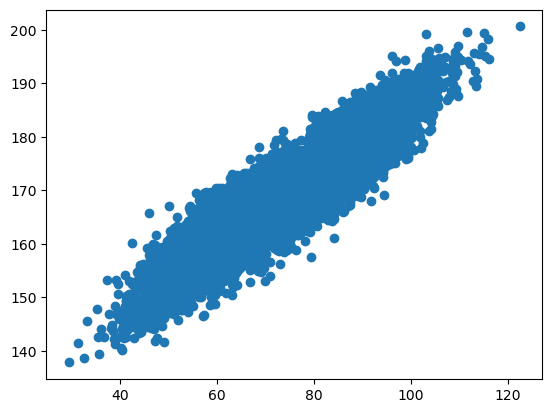

In [3]:
# 키와 몸무게에 관한 산점도를 그렵봅니다.
# 산점도가 직선의 방향성을 지니고 있을 때, 선형회귀를 사용합니다.
import matplotlib.pyplot as plt
plt.scatter(df['Weight'],df['Height'])

plt.show()

In [12]:
# 선형회귀 모델을 통한 학습을 진행합니다.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr = LinearRegression()
y=df['Weight']
X=df['Height']
X=X.values.reshape((-1,1))
y=y.values.reshape((-1,1))
lr.fit(X,y)

LinearRegression()

In [13]:
# 학습한 내용을 바탕으로 예측합니다.
lr.predict([[170]])

array([[75.19390579]])

In [19]:
# 회귀식의 기울기와 절편을 구합니다
# 기울기 : coef_,  절편 : intercept_
lr.coef_
lr.intercept_

array([-159.09171408])

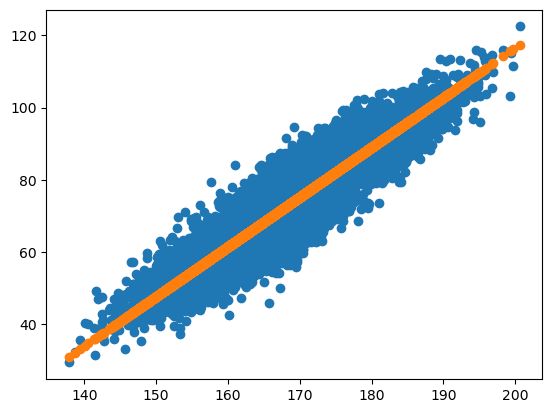

In [18]:
# 예측값 그래프 그리기
plt.plot(X, y, 'o')
plt.plot(X,lr.predict(X),'o')
plt.show()

## data split을 통한 모델 검증

In [20]:
#case 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

# train, test 분리를 위해 numpy배열로 변환
data = df['Height'].to_numpy()
target = df['Weight'].to_numpy()


# train, test 분리
훈련용_data, 테스트용_data, 훈련용_target, 테스트용_target=train_test_split(data,target,test_size=0.2)
# 행(row)으로 나열된 데이터를 열(column) 단위로 변경
훈련용_data = 훈련용_data.reshape(-1,1)
테스트용_data = 테스트용_data.reshape(-1,1)

In [23]:
# 선형회귀모델 학습
lr = LinearRegression()
lr.fit(훈련용_data, 훈련용_target)

# [170] 데이터 넣어서 예측값 확인하기
lr.predict([[170]])

array([75.20132879])

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = lr.predict(테스트용_data)
y_true = 테스트용_target

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'MSE: {mse}\nMAE: {mae}\nR^2 Score: {r2}')

MSE: 29.88980227401523
MAE: 4.36351239830039
R^2 Score: 0.8526271126505977


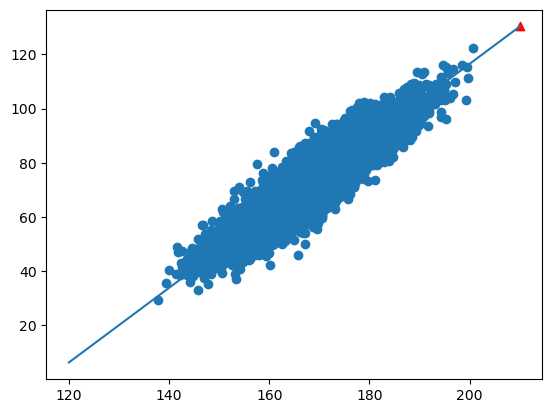

In [27]:
# 예측 그래프 그리기
import matplotlib.pyplot as plt
plt.scatter(훈련용_data , 훈련용_target)
plt.plot( [120,210], [120*lr.coef_ +lr.intercept_ ,
                    210*lr.coef_ + lr.intercept_])
plt.scatter(210 , 210*lr.coef_ + lr.intercept_ ,marker="^",color="red")
plt.show()